In [1]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('/home/douglas/matched2.csv', format = 'csv') 
print(data_table[1].columns)

<TableColumns names=('source_id_1','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z','source_id_2','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC_2','el_rGC_2','eu_rGC_2','RGC_2a','el_RGC_2a','eu_RGC_2a','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


In [2]:
print(data_table["source_id_1"])

   source_id_1    
------------------
     2851858288640
     3332894779520
     7632157690368
     9281425163264
    12545600306304
    13301514552192
    13473313244288
    15530601898496
    15637976759168
    15741055975040
               ...
205628431244595456
205629500695518336
205631695419740032
205632971028914304
205634036180801920
205634306759854848
205635200112139520
205635891606446848
205637197273096064
205637918830969728
205638399867322880
Length = 119628 rows


In [21]:
Jr = np.array(data_table["Jr"])
Jphi = np.array(data_table["Jphi"])
Jz = np.array(data_table["Jz"])
Or = np.array(data_table["Freq_r"])
Ophi = np.array(data_table["Freq_phi"])
Oz = np.array(data_table["Freq_z"])
X = np.array(data_table["xGC"]) * 0.001
Y = np.array(data_table["yGC"]) * 0.001
Z = np.array(data_table["zGC"]) * 0.001
U = np.array(data_table["U"])
V = np.array(data_table["V"])
W = np.array(data_table["W"])

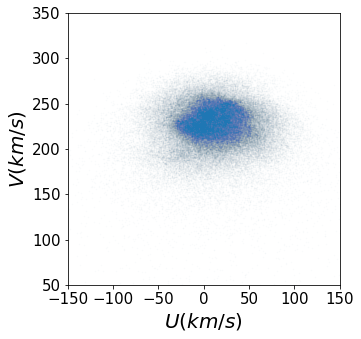

In [44]:
#making sure match worked
plt.figure(figsize=(5,5))

plt.scatter(U, V, s=0.1, alpha=0.03)

plt.xlim(-150,150)
plt.ylim(50,350)

#Labelling axes and increasing tick size.
plt.xlabel("$U(km/s)$", fontsize=20)
plt.ylabel("$V(km/s)$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Equalling space in between ticks
plt.gca().set_aspect("equal",adjustable="box")

Text(0,0.5,'$|J_z\\ /\\ J_{\\phi}|$')

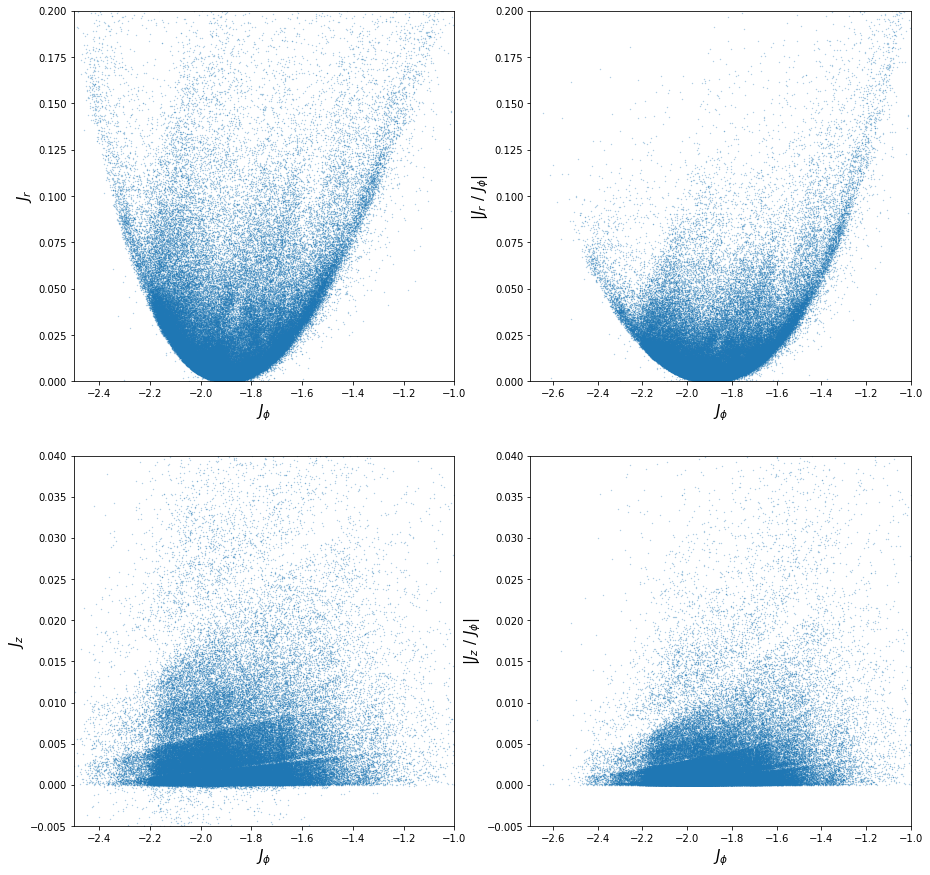

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0, 0].scatter(Jphi, Jr, s=0.1, alpha=0.5)
axs[0, 0].axis([-2.5, -1, 0, 0.2])
axs[0, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 0].set_ylabel("$J_r$",fontsize=15)

axs[0, 1].scatter(Jphi,np.abs(Jr/Jphi),s=0.1, alpha=0.5)
axs[0, 1].axis([-2.7, -1, 0, 0.2])
axs[0, 1].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 1].set_ylabel("$|J_r\ /\ J_{\phi}|$",fontsize=15)

axs[1, 0].scatter(Jphi, Jz, s=0.1, alpha=0.5)
axs[1, 0].axis([-2.5, -1, -0.005, 0.04])
axs[1, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 0].set_ylabel("$J_z$",fontsize=15)

axs[1, 1].scatter(Jphi,np.abs(Jz/Jphi),s=0.1, alpha=0.5)
axs[1, 1].axis([-2.7, -1, -0.005, 0.04])
axs[1, 1].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 1].set_ylabel("$|J_z\ /\ J_{\phi}|$",fontsize=15)

In [23]:
print(Ophi)

[-0.02783426 -0.02409359 -0.02356673 ... -0.03191052 -0.0287359
 -0.02927058]


/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


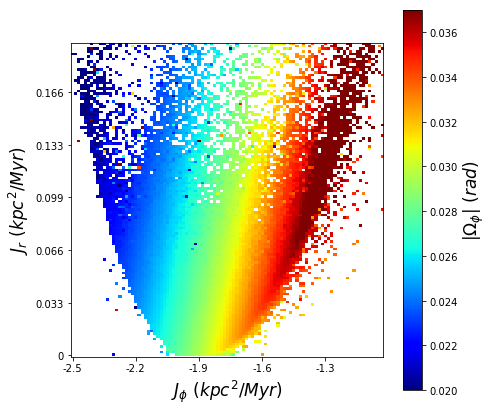

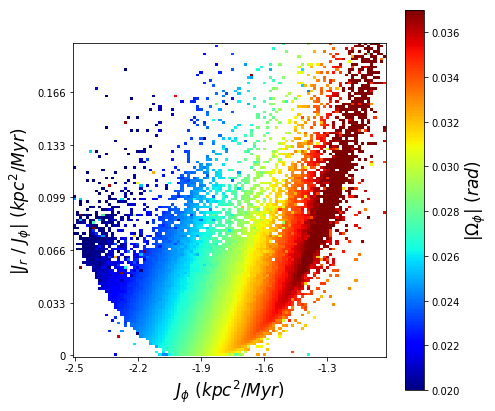

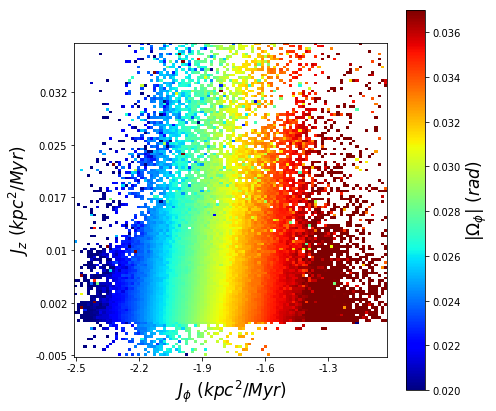

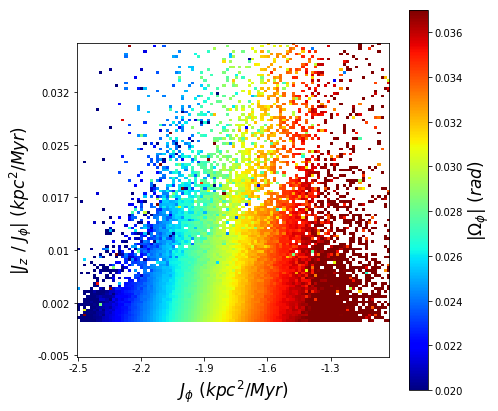

In [39]:
xmin = -2.5
xmax = -1
for i in range (0,4):
    if i == 0:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = Jr
        w = Ophi
        ylabel = '$J_r\ (kpc^2/Myr)$'
    elif i == 1:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = np.abs(Jr/Jphi)
        w = Ophi 
        ylabel = '$|J_r\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    elif i == 2:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = Jz
        w = Ophi 
        ylabel = '$J_z\ (kpc^2/Myr)$'
    else:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = np.abs(Jz/Jphi)
        w = Ophi 
        ylabel = '$|J_z\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)           ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = 0.020 ,vmax = 0.037)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label('$|\Omega_{\phi}|\  (rad)$',size=17)
    plt.xlabel("$J_{\phi}\ (kpc^2/Myr)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('-2.5','-2.2','-1.9','-1.6','-1.3','-1'))
    if i == 0 or i == 1:
        plt.yticks(np.arange(0,120,step=20),('0','0.033','0.066','0.099','0.133','0.166','0.2'))
    elif i == 2 or i == 3:
        plt.yticks(np.arange(0,120,step=20),('-0.005','0.002','0.01','0.017','0.025','0.032','0.04'))

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


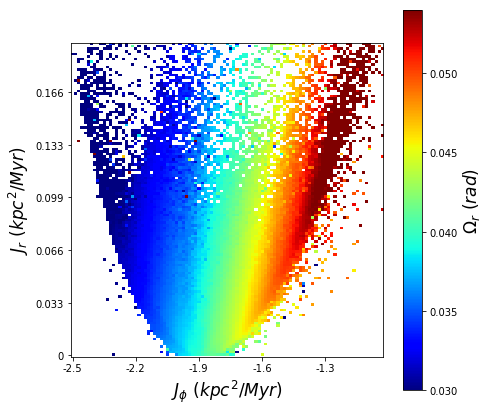

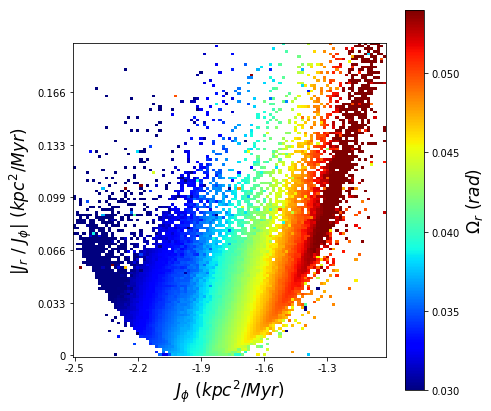

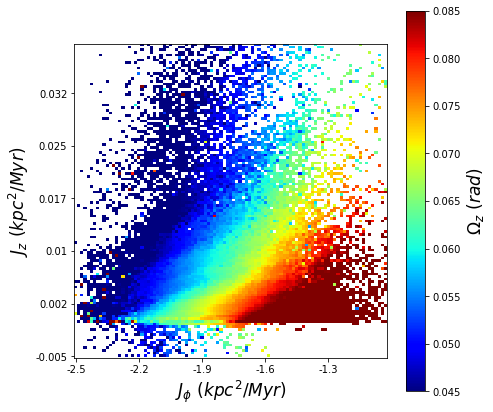

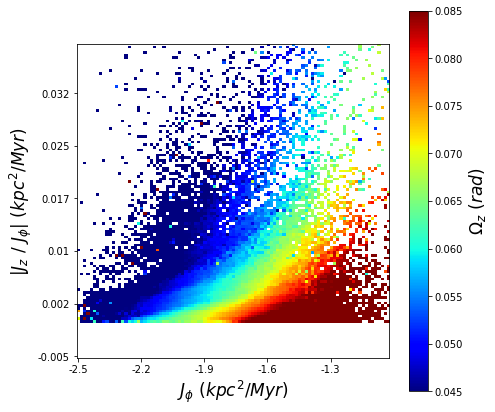

In [51]:
for i in range (0,4):
    if i == 0:
        ymin = 0
        ymax = 0.2
        vmin = 0.03
        vmax = 0.054
        step = 0.0016667
        x = Jphi
        y = Jr
        w = Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$\Omega_{r}\ (rad)$'
    elif i == 1:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = np.abs(Jr/Jphi)
        w = Or
        ylabel = '$|J_r\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    elif i == 2:
        ymin = -0.005
        ymax = 0.04
        vmin = 0.045
        vmax = 0.085
        step = 0.000375
        x = Jphi
        y = Jz
        w = Oz 
        ylabel = '$J_z\ (kpc^2/Myr)$'
        label = '$\Omega_{z}\ (rad)$'
    else:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = np.abs(Jz/Jphi)
        w = Oz
        ylabel = '$|J_z\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)           ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=17)
    plt.xlabel("$J_{\phi}\ (kpc^2/Myr)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('-2.5','-2.2','-1.9','-1.6','-1.3','-1'))
    if i == 0 or i == 1:
        plt.yticks(np.arange(0,120,step=20),('0','0.033','0.066','0.099','0.133','0.166','0.2'))
    elif i == 2 or i == 3:
        plt.yticks(np.arange(0,120,step=20),('-0.005','0.002','0.01','0.017','0.025','0.032','0.04'))

In [6]:
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

pot = gp.MilkyWayPotential(units=galactic)

kpc2myr_to_kpc2s = 1/(3.1536e13)
kms_to_kpcs = 3.2408e-17

rcirc = np.abs(Jphi*kpc2myr_to_kpc2s/(V*kms_to_kpcs))  #wrong?

print(rcirc)

[ 6.39729781 10.09957663  9.86019088 ...  7.02559159  7.68649498
  8.84501426]


In [7]:
zmax = []
maxr = []
minr = []
import astropy.units as u

for i in range(0,len(Jr)):
    #Defining Phase Space
    phase = gd.PhaseSpacePosition(pos=[X[i], Y[i], Z[i]] *u.kpc,
                            vel=[U[i], V[i], W[i]] *u.km/u.s)
    
    #Integrating orbit
    orb = gp.Hamiltonian(pot).integrate_orbit(phase, dt=0.1, n_steps=10000)
    
    zmax.append(orb.zmax().value)
    maxr.append(orb.apocenter().value)
    minr.append(orb.pericenter().value)

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [79]:
z = np.array(orb.z.value)
print(np.max(z))
print(zmax)
x = np.array(orb.x.value)
y = np.array(orb.y.value)
print(np.sqrt(np.max(x)**2 + np.max(y)**2))
print(maxr[len(maxr)-1])

0.3985701246421096
[0.31161723 0.39075032 0.29069903 ... 0.1121999  0.11478262 0.36996995]
15.104010205404029
10.789255793268893


In [13]:
from astropy.io import fits
c1 = fits.Column(name='zmax', array=np.array(zmax), format='D', unit = 'kpc')
c2 = fits.Column(name='maxr', array=np.array(maxr), format='D', unit = 'kpc')
c3 = fits.Column(name='minr', array=np.array(minr), format='D', unit = 'kpc')

t = fits.BinTableHDU.from_columns([c1, c2, c3])

t.writeto('orbitvalues.fits')

Text(0,0.5,'$|J_z/{L_z}|$')

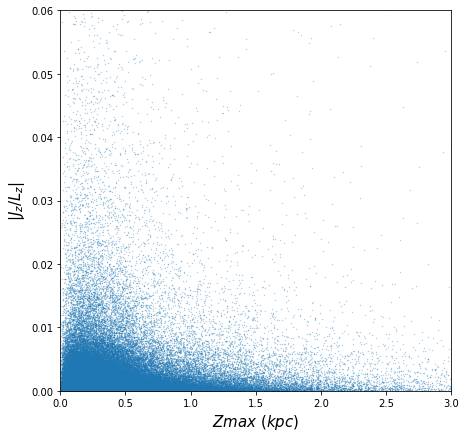

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(zmax, np.abs(Jz/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,3)
plt.ylim(0,0.06)
plt.xlabel("$Zmax\ (kpc)$",fontsize=15)
plt.ylabel("$|J_z/{L_z}|$", fontsize=15)

Text(0,0.5,'$|J_r/{L_z}|$')

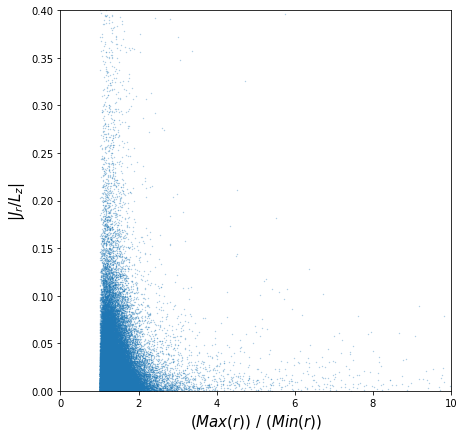

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(np.abs(maxr/minr), np.abs(Jr/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,10)
plt.ylim(0,0.4)
plt.xlabel("$(Max(r))\ /\ (Min(r))$",fontsize=15)
plt.ylabel("$|J_r/{L_z}|$", fontsize=15)

Text(0,0.5,'$|J_r/{L_z}|$')

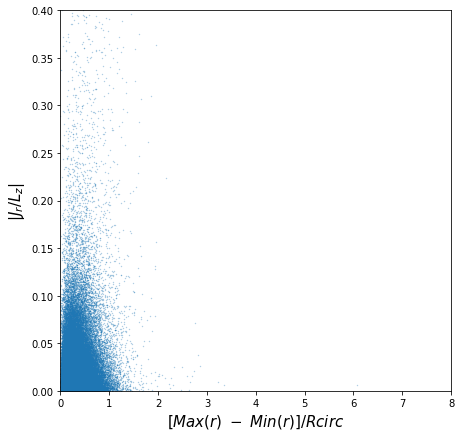

In [16]:
plt.figure(figsize=(7,7))
plt.scatter((maxr-minr)/rcirc, np.abs(Jr/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,8)
plt.ylim(0,0.4)
plt.xlabel("$[Max(r)\ -\ Min(r)]/Rcirc$",fontsize=15)
plt.ylabel("$|J_r/{L_z}|$", fontsize=15)

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


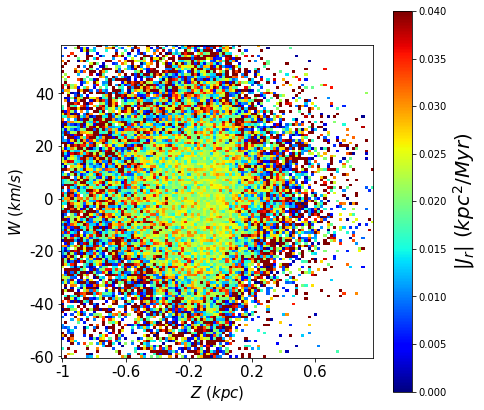

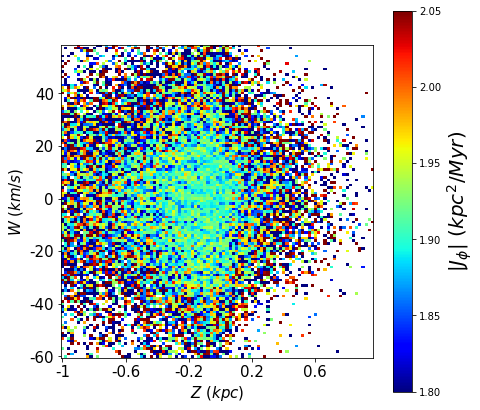

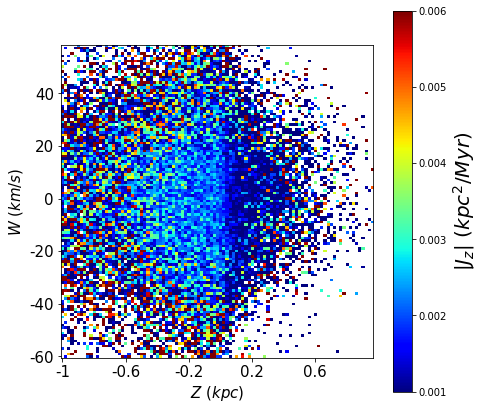

In [55]:
##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(-1,1, step=0.02)   ## 100
bin_y = np.arange(-60,60, step=1)    ## 120
H, xed, yed = np.histogram2d(Z, W, bins=(bin_x,bin_y))

##############################################################################
# Creating my empty 2-D array that will be my color function
color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array

for i in range (0,3):
    if i == 0:
        w = Jr 
        vmin = 0
        vmax = 0.04
        label = '$|J_r|\  (kpc^{2}/Myr)$'
    elif i == 1:
        w = Jphi
        vmin = 1.8
        vmax = 2.05
        label = '$|J_{\phi}|\  (kpc^{2}/Myr)$'
    elif i == 2:
        w = Jz
        vmin = 0.001
        vmax = 0.006
        label = '$|J_{z}|\  (kpc^{2}/Myr)$'
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (Z>bin_x[j]) & (Z<bin_x[j+1]) 
                               & (W>bin_y[k]) & (W< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=20)
    plt.xlabel("$Z\ (kpc)$", fontsize=15)
    plt.ylabel("$W\ (km/s)$", fontsize=15)
    plt.xticks(np.arange(0,100,step=20),('-1','-0.6','-0.2','0.2','0.6','1'),fontsize=15)
    plt.yticks(np.arange(0,120, step =20), ('-60','-40','-20','0','20','40','60'), fontsize=15)